In [1]:
#The packaging for loading brain data
import nibabel as nib 
#The packaging for processing brain data
import nilearn
#The method to import data
from nilearn import datasets
#The method to see how we can make transformation
from nilearn.maskers import NiftiLabelsMasker
#the masking strategy
from nilearn import masking
#The method to visulize the plot
from nilearn import plotting
#Which can help us to transform format
from nilearn import image
#A way to calculate thr group level spare covariance
from sklearn.covariance import GraphicalLassoCV
#
from nilearn import regions
#Import NiftiMasker
from nilearn.maskers import NiftiMasker
#
from nilearn.connectome import ConnectivityMeasure
import time
from nilearn.regions import Parcellations
#Other common packages
import os
#add a pretty printer
from pprint import pprint
import matplotlib.pyplot as plt
#To help the plot
from matplotlib.ticker import FormatStrFormatter
import numpy as np
#To calculate the inverse covariance matrix
from sklearn.covariance import GraphicalLassoCV
#calculate time for data processing
from tqdm import tqdm
from nilearn.interfaces.fmriprep import load_confounds

# Date Preprocessing

In [2]:
#The directory to the data we expect with BIDS form
#However,because we only need part of these data, we don't download the whole set
data_dir='AOMIC-PIOP1/derivatives/fmriprep/'
#
List_of_AOMIC=os.listdir(data_dir)
#List_of_AOMIC.remove(".DS_Store")
#loop the folder to read each subfolder so that we can handle all of these
func_filenames=[]
confounds_filenames=[]
#loop
for folder_name in List_of_AOMIC:
    for file in os.listdir(data_dir+folder_name+'/func/'):
        if file[-3:]==".gz":
            func_filenames.append(data_dir+folder_name+'/func/'+file)
        if file[-4:]==".tsv":
            confounds_filenames.append(data_dir+folder_name+'/func/'+file)

In [3]:
#Load one subject's data to see how we clean the FMRI data
data_sample=image.load_img(func_filenames[0])

/Users/rongyingqi1/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



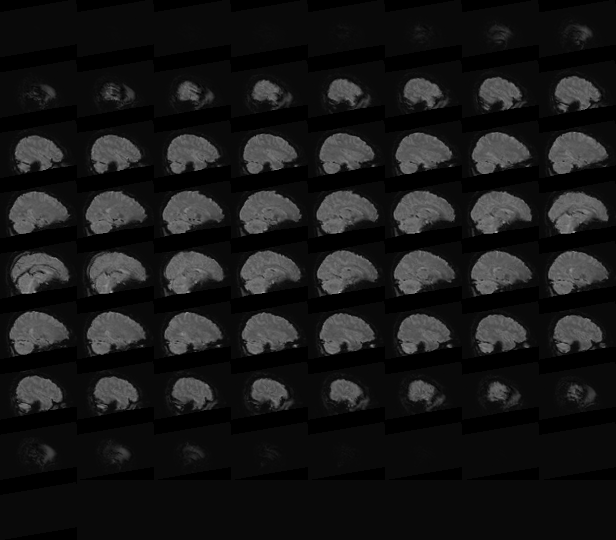
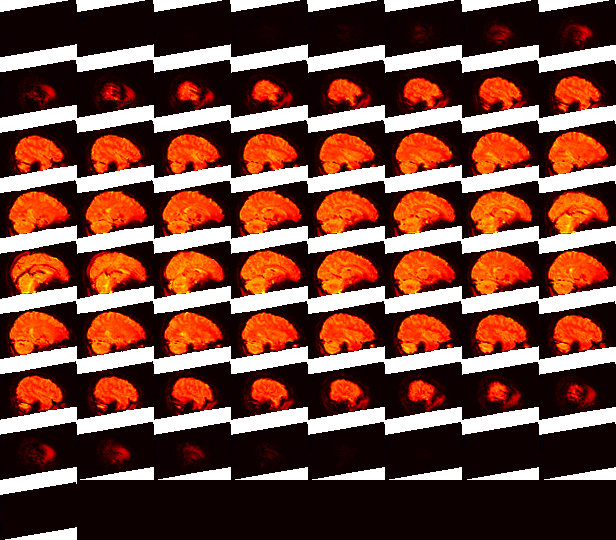

In [6]:
#Create a mean image to see the usual format
data_sample_mean=image.mean_img(data_sample)
plotting.view_img(data_sample_mean,bg_img=data_sample_mean)

In [7]:
#Since we can can how many number of of ROIs we want to investigate in a large range
dataset = datasets.fetch_atlas_schaefer_2018(n_rois=100)
#dataset = datasets.fetch_atlas_aal()
atlas_filename = dataset.maps
labels = dataset.labels
#indices=dataset.indices
description=dataset.description

In [8]:
#Then,we need to set up strategies on how clean the data
masker = NiftiLabelsMasker(labels_img=atlas_filename,standardize=True,detrend=True)

In [9]:
confounds_minimal_no_gsr, sample_mask = load_confounds(
    func_filenames,
    strategy=["high_pass", "motion", "wm_csf", "global_signal"],
    motion="basic",
    wm_csf="basic",
    global_signal="basic",
)

In [10]:
#
num_of_func=len(func_filenames)
time_series=[]
for i in tqdm(range(num_of_func)):
    single_time_serie = masker.fit_transform(func_filenames[i],confounds=confounds_minimal_no_gsr[i],sample_mask=sample_mask[i])
    time_series.append(single_time_serie)

100%|██████████| 210/210 [1:37:54<00:00, 27.97s/it]


In [29]:
#Then,we can make a collection to have those time series with the same shape
reduced_time_series=[]
for single_time_series in time_series:
    if single_time_series.shape==time_series[0].shape:
        reduced_time_series.append(single_time_series)       

In [31]:
np.save('Preprocessed_files/AOMIC_PIOP1_schaefer.npy',reduced_time_series)